# Cleaning US Census Data

The objective of this project is to organize data from multiple csv files in such a way that the data can be used to make some useful histograms and scatterplots. One of the scatterplots to be made should show the average income in a state vs proportion of women in that state 

## Inspecting the Data

First we use `glob` to loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called `us_census`.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
files = glob.glob("states*.csv")

print(files)
states_list = []
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)

us_census = pd.concat(states_list)

['states8.csv', 'states9.csv', 'states4.csv', 'states5.csv', 'states7.csv', 'states6.csv', 'states2.csv', 'states3.csv', 'states1.csv', 'states0.csv']


Checking the columns of the table and their respective data types

In [30]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


We notice here that most of the data types here are objects. Let us view some of the first elements of our data frame by calling the `head()` function so as to get an idea why this might be the case.

In [31]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


## Using Regex

Turning the `Income` column into a format that is ready for conversion into a numerical type.

In [32]:
for index in range(0,len(us_census["Income"])):
    string = str(us_census['Income'].iat[index])
    replace_dol = string.replace('$', '')
    replace_com = replace_dol.replace(',', '')
    us_census['Income'].iat[index] = replace_com

us_census["Income"] = pd.to_numeric(us_census['Income'])
us_census["Income"]

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64

Splitting the `GenderPop` column into two new columns the `Men` column, and the `Women` column using `str.split` and separating those results.

In [33]:
us_census['GenderPop'].head()

Men = []
Women = []
for index in range(0,len(us_census["GenderPop"])):
    string = str(us_census['GenderPop'].iat[index])
    replace = string.split('_')
    Men.append(replace[0])
    Women.append(replace[1])

us_census['Men'] = Men
us_census['Women'] = Women

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316M,13367298F


Removing `M` and `F` in each entry and converting the both columns into numerical data types.

In [34]:
for index in range(0,len(us_census["Men"])):
    string = str(us_census['Men'].iat[index])
    replace = string.replace('M', '')
    us_census['Men'].iat[index] = replace
    
for index in range(0,len(us_census["Women"])):
    string = str(us_census['Women'].iat[index])
    replace = string.replace('F', '')
    us_census['Women'].iat[index] = replace
    
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


Now we have modified our data so that we can make the scatterplot that was mentioned earlier which would show 
the average income in a state vs proportion of women in that state.

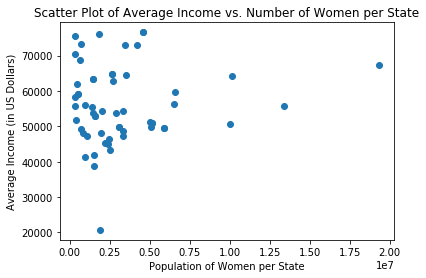

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Average Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Average Income (in US Dollars)")
plt.show()
plt.clf()

Let us check if our csv files had any `nan` values in them. If they do then we can fill those `nan`s by using pandas' `.fillna()` function. 
We are given the `TotalPop` per state and we have the number of `Men` per state. To get an estimate for the `nan` values in the `Women` column, we subtract the `Men` of the state from `TotalPop`.

In [39]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
print(us_census['Women'])

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


Checking for duplicates:

In [40]:
us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Dropping duplicates:

In [41]:
census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,1.61%,93.98%,0.98%,0.30%,1.24%,0.03%,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,8.01%,63.27%,20.18%,0.21%,5.46%,0.06%,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,11.14%,72.04%,3.38%,1.41%,7.02%,0.61%,64493.77,3487725M_3497739F,3487725,3497739.0
4,4,West Virginia,1851420,1.29%,92.18%,3.66%,0.15%,0.68%,0.03%,41437.11,913631M_937789F,913631,937789.0


Making the scatterplot again with modified data set:

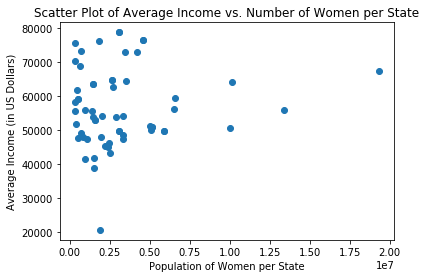

<Figure size 432x288 with 0 Axes>

In [42]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Average Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Average Income (in US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

Here we try and make histograms out of the race data that we have.
First we get rid of the percentage signs using regex and then conver the columns into a numeric type.
We again fill any `nan` values and drop any duplicates present as well.

In [44]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_census)):    
        string = str(us_census[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,0.04,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316M_13367298F,13171316,13367298.0
5,5,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229M_1444150F,1459229,1444150.0
1,1,Vermont,626604,1.61,93.98,0.98,0.30,1.24,0.03,55602.97,308573M_318031F,308573,318031.0
2,2,Virginia,8256630,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948M_4195682F,4060948,4195682.0
3,3,Washington,6985464,11.14,72.04,3.38,1.41,7.02,0.61,64493.77,3487725M_3497739F,3487725,3497739.0
4,4,West Virginia,1851420,1.29,92.18,3.66,0.15,0.68,0.03,41437.11,913631M_937789F,913631,937789.0
